# Ejemplo de Bootstrap

Para nuestro ejemplo, trataremos de encontrar un intervalo de confianza para la media de la muestra ($\mu$) vía simulación utilizando la técnica de Bootstrap

In [22]:
################################################################################################################
# BIBLIOTECAS 
################################################################################################################
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas
from scipy.stats import gaussian_kde, norm, t

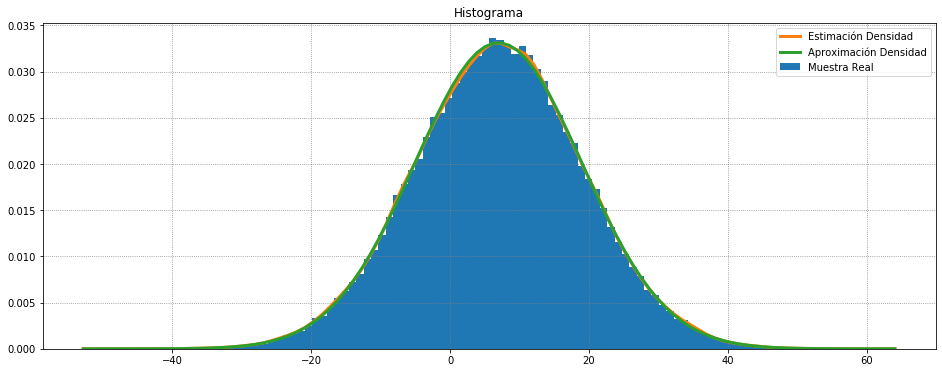

In [43]:
################################################################################################################
# LEEMOS LOS DATOS Y GRAFICAMOS
################################################################################################################
muestra = pd.read_csv("DATOS_100000.csv").values[:,0]
#print(muestra)

# Graficamos
plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.title("Histograma")
plt.hist(muestra, density=True, bins = 100, histtype='bar', label="Muestra Real")
particion_x = np.linspace( plt.gca().get_xlim()[0], plt.gca().get_xlim()[1] , 100 )
plt.plot( particion_x , gaussian_kde(muestra).evaluate(particion_x), linewidth=3, label="Estimación Densidad" )
plt.plot( particion_x, norm(loc=np.mean(muestra),scale=np.std(muestra)).pdf( particion_x ), 
        linewidth=3, label="Aproximación Densidad")
plt.grid(linestyle=':', color='gray', linewidth=0.8)
plt.legend()
plt.show()

### Proceso Bootstrap
El proceso Bootstrap radica en generar nuevas muestras a partir de la muestra original.
Estas nuevas muestras deben ser generadas uniformemente aleatorias con reemplazo y del mismo tamaño que la muestra original

In [ ]:
num_simulaciones   = 100000   # Número de simulaciones
muestras_bootstrap = list()   # Lista donde cada elemento es una muestra bootstrap
for sim in range(num_simulaciones):
    muestras_bootstrap.append( np.random.choice(a = muestra, size = muestra.shape, replace=True) )
muestras_bootstrap = np.array(muestras_bootstrap)
print(muestras_bootstrap)

### Bagging (Bootstrap Aggregation)

Hasta este punto, tenemos una lista con muestras generadas a partir de la muestra original.
Estas muestras se les conoce como muestras bootstrap.

Ahora la idea es resumir toda la información de las muestras a un solo resultado. 
Para este ejemplo de hacer un intervalo de confianza, simplemente vamos a calcular la media de cada muestra y guardar esos resultados en un nuevo arreglo.

In [37]:
muestras_bagging = np.zeros(muestras_bootstrap.shape[0])
for indice, muestra in enumerate( muestras_bootstrap ):
    muestras_bagging[indice] = np.mean( muestra )
print(muestras_bagging)

[7.12878998 6.70935591 6.68221281 ... 6.47076179 6.16414765 7.27552238]


**TIP** Se puede utilizar también funciones vectoriales que proveen mayor velocidad para arreglos de mayor longitud.
El ejemplo sería el siguiente:

In [28]:
np.apply_along_axis( func1d = np.mean, axis = 1, arr = muestras_bootstrap )

array([9.3690444 , 8.21120858, 9.5900809 , ..., 7.60935869, 7.01383901,
       4.59705031])

### Estimación del Intervalo de Confianza

In [38]:
alpha = 0.05
np.quantile(a = muestras_bagging, q = [alpha/2, 1 - alpha/2] )

array([6.09201548, 7.62220274])

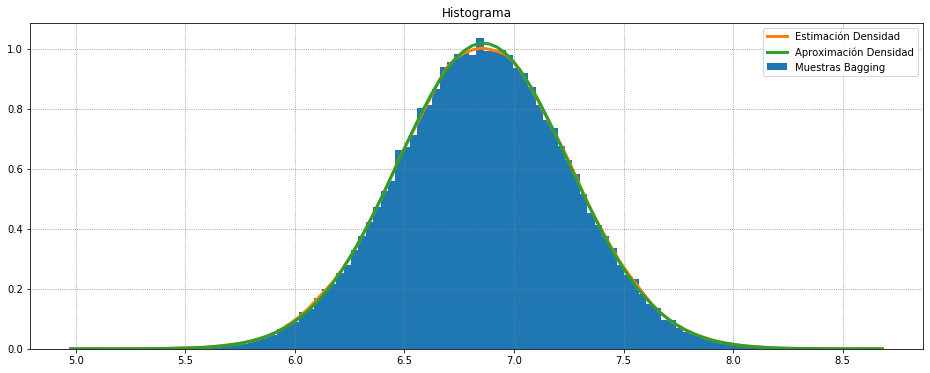

In [39]:
# Graficamos
plt.subplots(nrows=1, ncols=1, figsize=(16,6))
plt.title("Histograma")
plt.hist(muestras_bagging, bins = 100, density=True, histtype='bar', label="Muestras Bagging")
particion_x = np.linspace( plt.gca().get_xlim()[0], plt.gca().get_xlim()[1] , 100 )
plt.plot( particion_x , gaussian_kde(muestras_bagging).evaluate(particion_x), linewidth=3, label="Estimación Densidad" )
plt.plot( particion_x, norm(loc=np.mean(muestras_bagging),scale=np.std(muestras_bagging)).pdf( particion_x ), 
        linewidth=3, label="Aproximación Densidad")
plt.grid(linestyle=':', color='gray', linewidth=0.8)
plt.legend()
plt.show()

### Método Tradicional

Calcular el intervalo de confianza para la media ($\mu$) por medio de una cantidad pivotal.

Primer Intervalo
$$\overline{X} - \frac{\sigma(X)}{\sqrt{n}} \cdot Z_{(1-\alpha/2)} \leq \mu \leq \overline{X} + \frac{\sigma(X)}{\sqrt{n}} \cdot Z_{(1-\alpha/2)}$$

In [40]:
# Primer Intervalo
print( [ np.mean(muestra) - 12 / np.sqrt( muestra.shape[0] ) * norm().ppf(q=[1-alpha/2]),
         np.mean(muestra) + 12 / np.sqrt( muestra.shape[0] ) * norm().ppf(q=[1-alpha/2]) ] )

[array([6.53176834]), array([8.01927642])]


Segundo Intervalo 

$$\overline{X} - \frac{\hat{\sigma}(X)}{\sqrt{n}} \cdot t^{n-1}_{(1-\alpha/2)} \leq \mu \leq \overline{X} + \frac{\hat{\sigma}(X)}{\sqrt{n}} \cdot t^{n-1}_{(1-\alpha/2)}$$

In [41]:
# Segundo Intervalo
print( [ np.mean(muestra) - np.std(muestra, ddof = 1) / np.sqrt( muestra.shape[0] ) * t(muestra.shape[0]-1).ppf(q=[1-alpha/2]),
         np.mean(muestra) + np.std(muestra, ddof = 1) / np.sqrt( muestra.shape[0] ) * t(muestra.shape[0]-1).ppf(q=[1-alpha/2]) ] )

[array([6.52149466]), array([8.0295501])]
